In [24]:
import pandas as pd
import seaborn as sns

In [26]:
# trip data
taxi_file = ("taxi.parquet")
# location codes
lookup_file = ("taxi_zone_lookup.csv")

# load files
taxi = pd.read_parquet(taxi_file, engine="pyarrow")
lookup = pd.read_csv(lookup_file)
taxi.head(50)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.00,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.00,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.00,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.00,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.00,1.0,19.68,2.5,0.00
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,12.8,1.00,0.5,10.00,0.00,1.0,27.80,2.5,0.00
6,2,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,1.66,1.0,N,239,143,1,12.1,1.00,0.5,3.42,0.00,1.0,20.52,2.5,0.00
7,2,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,11.70,1.0,N,142,200,1,45.7,1.00,0.5,10.74,3.00,1.0,64.44,2.5,0.00
8,2,2023-01-01 00:21:44,2023-01-01 00:36:40,1.0,2.95,1.0,N,164,236,1,17.7,1.00,0.5,5.68,0.00,1.0,28.38,2.5,0.00
9,2,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,3.01,1.0,N,141,107,2,14.9,1.00,0.5,0.00,0.00,1.0,19.90,2.5,0.00


In [4]:
lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [27]:
taxi["pickup_day"] = taxi["tpep_pickup_datetime"].apply(lambda x: x.day)
taxi["pickup_dow"] = taxi["tpep_pickup_datetime"].apply(lambda x: x.day_name())
taxi["pickup_dow_num"] = taxi["tpep_pickup_datetime"].apply(lambda x: x.day_of_week)

In [28]:
newark_pickup = (taxi['PULocationID'] == 1).sum()
newark_dropoff = (taxi['DOLocationID'] == 1).sum()
jfk_pickup = (taxi['PULocationID'] == 132).sum()
jfk_dropoff = (taxi['DOLocationID'] == 132).sum()
lag_pickup = (taxi['PULocationID'] == 138).sum()
lag_dropoff = (taxi['DOLocationID'] == 138).sum()

print(f"Airport pickup numbers.\n Newark: {newark_pickup};\nJFK: {jfk_pickup};\nLaguardia: {lag_pickup};\n\n")
print(f"Airport dropoff numbers.\n Newark: {newark_dropoff};\nJFK: {jfk_dropoff};\nLaguardia: {lag_dropoff};")

Airport pickup numbers.
 Newark: 410;
JFK: 160030;
Laguardia: 89188;


Airport dropoff numbers.
 Newark: 7526;
JFK: 33190;
Laguardia: 32031;


In [29]:
airport_list = [1, 132, 138]
airport_zones = lookup.query("LocationID in @airport_list")

airport_pu = (
    taxi.merge(
        lookup,
        left_on=["PULocationID"],
        right_on=["LocationID"],
        how="inner")
)

result = airport_pu.query("PULocationID in @airport_list").groupby(["Zone"]).agg({"Zone": "count", "passenger_count": "sum"})
result.columns = ['pickup_count', 'passenger_count']
result.reset_index(inplace=True)
    

In [30]:
result

,Zone,pickup_count,passenger_count
0,JFK Airport,160030,228407.0
1,LaGuardia Airport,89188,119617.0
2,Newark Airport,410,648.0


In [31]:
airport_do = (
    taxi.merge(
        lookup.query("LocationID in @airport_list"),
        left_on=["DOLocationID"],
        right_on=["LocationID"],
        how="inner")
)

result_2 = airport_do.groupby(["Zone"]).agg({"Zone": "count", "passenger_count": "sum"})
result_2.columns = ['dropoff_count', 'passenger_count']
result_2.reset_index(inplace=True)

result_2

,Zone,dropoff_count,passenger_count
0,JFK Airport,33190,49805.0
1,LaGuardia Airport,32031,42552.0
2,Newark Airport,7526,12156.0


In [32]:
result_3 = taxi.query("PULocationID in @airport_list").groupby("PULocationID").agg({"airport_fee": "sum", "PULocationID": "count"})
result_3.columns = ['airport_fee_sum', 'pickup_count']
result_3.reset_index(inplace=True)

result_3.drop(0, axis=0, inplace=True)

In [33]:
result_3 = result_3.merge(lookup, left_on="PULocationID", right_on="LocationID", how="inner")

In [34]:
result_3

,PULocationID,airport_fee_sum,pickup_count,LocationID,Borough,Zone,service_zone
0,132,187165.0,160030,132,Queens,JFK Airport,Airports
1,138,108615.0,89188,138,Queens,LaGuardia Airport,Airports


In [35]:
taxi.query("PULocationID == 1 and airport_fee > 0")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_dow,pickup_dow_num
261195,2,2023-01-04 14:49:22,2023-01-04 14:49:42,2.0,0.0,5.0,N,1,1,1,...,0.0,40.69,11.75,1.0,204.69,0.0,1.25,4,Wednesday,2
2559949,2,2023-01-27 15:15:51,2023-01-27 15:19:06,1.0,0.0,5.0,N,1,1,2,...,0.0,0.00,0.00,1.0,127.25,0.0,1.25,27,Friday,4


In [36]:
trips_merged_do_all = (
    taxi.merge(
        lookup,
        left_on=["DOLocationID"],
        right_on=["LocationID"],
        how="left")
)

borough_metrics = trips_merged_do_all.groupby("Borough").agg({"tip_amount": ["sum", "mean"] , "DOLocationID": "count", "trip_distance": "mean"}).reset_index()

In [37]:
borough_metrics.head()

Borough  tip_amount            DOLocationID trip_distance
                     sum       mean        count          mean
0      Bronx    61818.26   3.375649        18313     10.332796
1   Brooklyn   704746.40   5.927120       118902      9.061841
2        EWR   108362.21  14.398380         7526     17.885436
3  Manhattan  8382541.67   3.075169      2725880      3.189211
4     Queens   873584.81   5.405044       161624      8.808632

In [38]:
borough_metrics[["Borough", "tip_amount"]]

Borough  tip_amount           
                         sum       mean
0          Bronx    61818.26   3.375649
1       Brooklyn   704746.40   5.927120
2            EWR   108362.21  14.398380
3      Manhattan  8382541.67   3.075169
4         Queens   873584.81   5.405044
5  Staten Island     5859.28   6.028066
6        Unknown    76625.08   3.391841

In [50]:

result_5 = pd.DataFrame(
    airport_pu.groupby("Zone")["passenger_count"].sum().sort_values(ascending=False)
)


result_5.head()

,passenger_count
Zone,
JFK Airport,228407.0
Upper East Side South,192476.0
Midtown Center,181236.0
Upper East Side North,180238.0
Penn Station/Madison Sq West,143349.0


<Axes: xlabel='Borough', ylabel='tip_amount'>

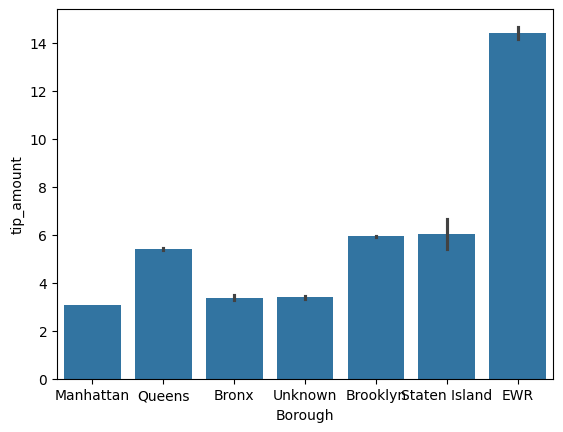

In [42]:
sns.barplot(trips_merged_do_all, x="Borough", y="tip_amount")
plt.title("Tips by Borough")
plt.xlabel("Borough")
